Michael Buchwitz, 20-Nov-2024

# How to access and use a satellite-derived GHG Level 2 data product using XCO2_EMMA as an example? 

This is a Jupyter Notebook (JN) illustrating how to access and use a satellite-derived Greenhouse Gas (GHG) atmospheric carbon dioxide (CO2) Level 2 data product as generated via the Copernicus Climate Change Service (C3S) and made available via the Copernicus Climate Data Store (CDS, https://cds.climate.copernicus.eu/).

Here we illustrate the use of a GHG Level 2 (L2) product using product XCO2_EMMA as an example. A CO2 L2 data product contains CO2 information for individual satellite ground pixels (also called footprints or soundings). XCO2 is the column-averaged dry-air mole fraction of atmospheric CO2 in parts per million (ppm). EMMA is the name of the multi-satellite XCO2 (and XCH4) merging algorithm developed to generate product XCO2_EMMA using as input individual Level 2 XCO2 products from different satellite sensors (here: SCIAMACHY/ENVISAT, GOSAT, GOSAT-2 and OCO-2; see, e.g., Reuter et al., https://amt.copernicus.org/articles/13/789/2020/, 2020). 

Within C3S also other L2 products had been generated and made available via the CDS. These products are (i) XCO2 from individual satellite sensors, (ii) XCH4 products, where XCH4 is the column-averaged dry-air mole fraction of CH4 in parts per billion (ppb), and (iii) mid tropospheric CO2 and CH4 mixing ratio products. Detailed information on all these products is available via the CDS. In addition to L2 products, also Level 3 (L3) products are available. A L3 product is based on a corresponding L2 product. A L3 product is  obtained by spatio-temporally averaging a corresponding L2 product. How to access and use a L3 GHG product is shown in a separate Jupyter Notebook (JN).

For this JN we use XCO2_EMMA version 4.5, which covers the period 2003 - 2022. 

This JN shows how to download a data product from the CDS, explains how to access the main variables and how to use them for interesting applications. We focus on two use cases related to the spatial and temporal variation of atmospheric CO2 concentrations and their observational coverage. 

The first use case is related to the latitudial distribution of XCO2. We show how XCO2 averages and standard devations per latitude band can be computed and plotted. For this we use two days of observations, one in April and one in September. We explain that the observed latitudinal distributions are closely related to the seasonal cycle of CO2 due to uptake and release of CO2 by vegetation.

For the second use case we show how a map of the spatial distribution of the individual ground pixel XCO2 observations can be generated. We show that the spatial coverage of the daily observations is very sparse due to strict quality filtering of the individual XCO2 retrievals. Most applications therefore require appropriate spatio-temporal averaging (see, for example, the use of C3S GHG XCO2 and XCH4 data for assessments such as Copernicus European State of the Climate (ESOTC) as shown on the GHG concentration climate indicators website https://climate.copernicus.eu/climate-indicators/greenhouse-gas-concentrations).

## What is needed to use this Jupyter Notebook?

In the following, Phython 3 code is provided to read and plot the satellite data.

It is assumed that Python and Jupyter Notebook (JN) is installed on your computer, e.g., using the Anaconda distribution
(https://www.anaconda.com/products/distribution).

## Imports

 We have to import several modules to run this JN.

In [2]:
# Import libraries needed for the Jupyter notebook
# Note that lines starting with "#" are comment lines

# Libraries for working with data, especially multidimensional arrays
import numpy as np
import pandas as pd
import xarray as xr

# Library to work with zip-archives and operating system (OS) functions and pattern expansion
import zipfile
import os
from pathlib import Path

# Libraries for plotting and visualising data
import matplotlib.pyplot as plt
import matplotlib as mplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Libraries for style parameters
from pylab import rcParams
import seaborn as sns

# Disable warnings for data download via API
import urllib3
urllib3.disable_warnings()

print('* ... finished importing modules')

* ... finished importing modules


## How to access data via CDS API (cdsapi)

The C3S data products can be downloaded from the Copernicus Climate Data Store (CDS) using the cdsapi, i.e., 
the CDS Application Programming Interface (API). How to use the cdsapi is described here.

First, goto the CDS website:
https://cds.climate.copernicus.eu/

Login (if not done already, please register using "Create new account").

To use the cdsapi you need to set two variables, URL and KEY:

In [3]:
URL='https://cds.climate.copernicus.eu/api'

# Replace this KEY by your personnal KEY:

KEY='XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

print('* URL: ', URL)
print('* KEY: ', KEY)

* URL:  https://cds.climate.copernicus.eu/api
* KEY:  a8764fcc-d86b-4791-81c7-66c40885a25a


KEY 'XXX....XXX' is only a placeholder and needs to be replaced by your personal KEY. 

To get your personnal KEY, please login to the CDS ebsite (see above) and then visit https://cds.climate.copernicus.eu/how-to-api. 

KEY will appear on the screen. Use that KEY to replace the placeholder key shown above.

In the following we show how to download the two (daily) data files, which we need for this JN.

## Data download via CDS API (cdsapi)

C3S GHG data products can be obtained from the CDS via the CDS user interface. 

For satellite-derived atmospheric CO2 data products please visit this website: 
https://cds.climate.copernicus.eu/datasets/satellite-carbon-dioxide?tab=overview.

Detailed information on all products is provided via the "Documentation" tab. 

For data download visit the "Download" tab.

For this JN we want to access data product XCO2_EMMA, version 4.5, for these two days: 
- File 1: 15-April-2020
- File 2: 15-September-2020

In order to get these data please select the following on the "Download" tab:
- Processing level: Level 2
- Variable: Column-average dry-air mole fraction of atmospheric Carbon Dioxide (XCO2) and related variables
- Sensor and algorithm: MERGED and EMMA
- Year: 2020
- Month: April and September
- Day: 15
- Version: 4.5

Finally, click on: 
- Show API request code

The following Python code will appear in your browser:

import cdsapi

dataset = "satellite-carbon-dioxide"

request = {

    "processing_level": ["level_2"],
    
    "variable": "xco2",
    
    "sensor_and_algorithm": "merged_emma",
    
    "year": ["2020"],
    
    "month": ["04", "09"],
    
    "day": ["15"],
    
    "version": ["4_5"]
    
}

client = cdsapi.Client()

client.retrieve(dataset, request).download()

We copied this code into this JN to download the data, as shown below.

## Setting default plot style parameters

Here we set some parameters which determine the style of the generated figures.

In [5]:
# The following style parameters will be used for all plots in this use case.
rcParams['figure.figsize'] = [15,5]
rcParams['figure.dpi'] = 350
#rcParams['font.family'] = 'serif'
rcParams['font.family'] = 'Arial'
#rcParams['font.serif'] = mplt.rcParamsDefault['font.serif']
#rcParams['mathtext.rm'] = 'serif:light'
#rcParams['mathtext.it'] = 'serif:italic'
#rcParams['mathtext.bf'] = 'serif:bold'
rcParams['mathtext.default'] = 'regular'
plt.rc('font', size=17)          # controls default text sizes
plt.rc('axes', titlesize=17)     # fontsize of the axes title
plt.rc('axes', labelsize=17)     # fontsize of the x and y labelsize
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=10)    # fontsize of the legend
plt.rc('figure', titlesize=18)   # fontsize of the figure title

projection = ccrs.PlateCarree()
mplt.rc('xtick', labelsize=9)
mplt.rc('ytick', labelsize=9)

print('* ... finished setting plot style parameters')

* ... finished setting plot style parameters


## Other preparatory work including setting the data directory

Data will be stored in sub-directory "data_dir". If this directory does not exist, then it will be generated.

In [5]:
# Specify local data directory for the downloads:

#data_directory = "./data_dir_tmp/"   # Test only
data_directory = "data_dir"

DATADIR = Path(data_directory)

if not os.path.exists(DATADIR):
   print('* Generating: ', DATADIR) 
   os.mkdir(DATADIR)
else:
   print('* sub-directory exists: ', DATADIR)

* Generating:  data_dir


## Initial user input:

In [6]:
product_id = 'XCO2_EMMA'  # keep

# Select one version (by commenting in/out):
#product_version = 'v4.4'; product_version_str2 = '4_4'
product_version = 'v4.5'; product_version_str2 = '4_5'

# We want to get 2 daily data files:
year_1 = 2020; day_1 = 15; month_1 = 4
year_2 = 2020; day_2 = 15; month_2 = 9

product_str = product_id+' '+product_version

print('* selected product: ', product_str)

* selected product:  XCO2_EMMA v4.5


## Check if the two data files have already been downloaded:

Here we check if files 1 and 2 are already available:

In [8]:
# Generate corresponding time strings:
# ... for the first day:
year_1_str = str(year_1); day_1_str = str(day_1); month_1_str = str(month_1)
if day_1 < 10:
   day_1_str = '0'+day_1_str
if month_1 < 10:
   month_1_str = '0'+month_1_str
# ... for the second day:
year_2_str = str(year_2); day_2_str = str(day_2); month_2_str = str(month_2)
if day_2 < 10:
   day_2_str = '0'+day_2_str
if month_2 < 10:
   month_2_str = '0'+month_2_str

# Combine to generate date strings:
date_1_str = year_1_str+month_1_str+day_1_str
date_2_str = year_2_str+month_2_str+day_2_str
print('* Selected day 1: ', date_1_str)
print('* Selected day 2: ', date_2_str)

# Names of the two desired data files:
wanted_file_1 = date_1_str+'-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-'+product_version+'.nc'
wanted_file_2 = date_2_str+'-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-'+product_version+'.nc'

wanted_path_file_1 = DATADIR/wanted_file_1
wanted_path_file_2 = DATADIR/wanted_file_2
print('* Wanted file 1: ', wanted_path_file_1)
print('* Wanted file 2: ', wanted_path_file_2)

# Check if desired data files have already been downloaded:
product_already_downloaded = 'no'
if (os.path.exists(wanted_path_file_1) == True):
   if (os.path.exists(wanted_path_file_2) == True):
      product_already_downloaded = 'yes'
print('* Product files already downloaded?: ', product_already_downloaded)

* Selected day 1:  20200415
* Selected day 2:  20200915
* Wanted file 1:  data_dir\20200415-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.5.nc
* Wanted file 2:  data_dir\20200915-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.5.nc
* Product files already downloaded?:  no


## Data download via cdsapi (if required):

Here we show how to access the CDS using the cdsapi code generated as explained above:

In [9]:
if product_already_downloaded == 'no':

   print('* downloading data via cdsapi ...')
   
   # The following code has been generated (apart from minor modifications)
   # via "Show API request code" as explained above:
    
   import cdsapi
    
   dataset = "satellite-carbon-dioxide"
   request = {
         "processing_level": ["level_2"],
         "variable": "xco2",
         "sensor_and_algorithm": "merged_emma",
         "year": ["2020"],
         "month": ["04", "09"],
         "day": ["15"],
         #"version": ["4_5"]
         "version": [product_version_str2]
   }
   client = cdsapi.Client(url=URL, key=KEY)
   # Generates download.zip file in current directory:
   client.retrieve(dataset, request).download('download.zip')
   # Unzip:
   path_to_zip_file        = 'download.zip'
   with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
      zip_ref.extractall(DATADIR)
    
   print('* ... finished downloading data via cdsapi') 
   print('* data are stored in directory: ', DATADIR)
    
else:
   print('* no data download via cdsapi as files already exist') 

* downloading data via cdsapi ...


2024-11-20 13:34:13,330 WARNING [2024-11-19T00:00:00] Issue with underlaying infrastructure is now solved. System should gradually recover. Please check updated status [here](https://status.ecmwf.int/)
2024-11-20 13:34:13,330 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-11-20 13:34:13,330 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-11-20 13:34:13,330 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-11-20 13:34:13,343 WARNING [2024-06-16T00:00:00] CDS 

eb80ed95b1b74d41f408ead16c391df.zip:   0%|          | 0.00/972k [00:00<?, ?B/s]

* ... finished downloading data via cdsapi
* data are stored in directory:  data_dir


## Reading the two downloaded data files:

Now we are reading the two data files:

In [10]:
# Read wanted files:
wanted_files_OK = 'no'
print('* trying to read file 1: ', wanted_path_file_1)
if (os.path.exists(wanted_path_file_1) == True):
   print('* reading file 1 ...')
   ds_1 = xr.open_dataset(wanted_path_file_1)
   print('* trying to read file 2: ', wanted_path_file_2)
   if (os.path.exists(wanted_path_file_2) == True):
      print('* reading file 2 ...')
      ds_2 = xr.open_dataset(wanted_path_file_2)
      wanted_files_OK = 'yes'
   else:
      print('* ERROR: file 2 does not exist !?')
else:
   print('* ERROR: file 1 does not exist !?')
 
# Read variables of interest:
if wanted_files_OK == 'yes':
   print('* ... reading files OK !')
   f1_xco2    = ds_1['xco2']              # XCO2 in ppm
   f1_xco2_qf = ds_1['xco2_quality_flag'] # 0 = good
   f1_lat     = ds_1['latitude']          # latitude [deg]
   f1_lon     = ds_1['longitude']         # longitude [deg]
   f2_xco2    = ds_2['xco2']              # XCO2 in ppm
   f2_xco2_qf = ds_2['xco2_quality_flag'] # 0 = good
   f2_lat     = ds_2['latitude']          # latitude [deg]
   f2_lon     = ds_2['longitude']         # longitude [deg]
   
   # Filter by quality flag:
   (idgd_1) = (f1_xco2_qf.values == 0).nonzero() # Get indices of good quality data for day 1
   (idgd_2) = (f2_xco2_qf.values == 0).nonzero() # Get indices of good quality data for day 2
   g_1_xco2 = f1_xco2[(idgd_1)]                  # Select sub-set of good data for day 1
   g_1_lat  = f1_lat[(idgd_1)]
   g_1_lon  = f1_lon[(idgd_1)]
   g_2_xco2 = f2_xco2[(idgd_2)]                  # Select sub-set of good data for day 2
   g_2_lat  = f2_lat[(idgd_2)]
   g_2_lon  = f2_lon[(idgd_2)]
else:
   print('* ERROR: Problem when reading input files !?')

* trying to read file 1:  data_dir\20200415-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.5.nc
* reading file 1 ...
* trying to read file 2:  data_dir\20200915-C3S-L2_XCO2-GHG_PRODUCTS-MERGED-MERGED-EMMA-DAILY-v4.5.nc
* reading file 2 ...
* ... reading files OK !


# Application 1: The latitudinal distribution of XCO2

Here our intention is to plot XCO2 as a function of latitude. For this we first need to define the latitude bands.

### Definition of latitude bands

In [11]:
print('* Computing latitude band center coordinates')
lat_band_width = 10.0           # Width of single latitude band in deg
d_lat = lat_band_width*0.5
lat_band_min = -90.0 + d_lat
lat_band_max = 90.0 - d_lat     # Width of entire latitude range
n_lat_bands = int((lat_band_max - lat_band_min) / lat_band_width)+1
lat_band_center = np.zeros(n_lat_bands)
for ii in range(n_lat_bands):   # Generate array of latitude band centers
   lat_band_center[ii] = lat_band_min + ii*lat_band_width
print('* lat_band_center: ', lat_band_center)

* Computing latitude band center coordinates
* lat_band_center:  [-85. -75. -65. -55. -45. -35. -25. -15.  -5.   5.  15.  25.  35.  45.
  55.  65.  75.  85.]


### Computing XCO2 vs latitude for the two selected days

Now we compute for each latitude band the mean value and the standard deviation of XCO2 for both days: 

In [12]:
# For file 1 data:
if wanted_files_OK == 'yes':
   print('* Computing XCO2 as a function of latitude for the data from file 1')
   # Relevant input data:
   lat_1 = g_1_lat
   ghg_1 = g_1_xco2
   # Init arrays:
   mean_ghg_1 = lat_band_center.copy() * 0.0
   std_ghg_1 = lat_band_center.copy() * 0.0 -999 # < 0 for too few data
   # Compute mean and standard deviation for each latitude band:
   for ii in range(n_lat_bands):
      act_lat = lat_band_center[ii]
      idg = np.where((lat_1 >= act_lat-d_lat) & (lat_1 < act_lat+d_lat))
      sel_1 = ghg_1[idg]; len_sel_1 = len(sel_1)
      #print('* len_sel_1: ', len_sel_1)
      if len_sel_1 > 1:
         mean_ghg_1[ii] = np.mean(sel_1)
         std_ghg_1[ii] = np.std(sel_1)
   idg = (std_ghg_1 > 0.0)
   lb_1_xco2_mean = mean_ghg_1[idg]
   lb_1_xco2_std = std_ghg_1[idg]
   lb_1_lat = lat_band_center[idg]
   print('* lb_1_xco2_mean: ', lb_1_xco2_mean)

# For file 2 data:
if wanted_files_OK == 'yes':
   print('* Computing XCO2 as a function of latitude for the data from file 2')
   # Relevant input data:
   lat_2 = g_2_lat
   ghg_2 = g_2_xco2
   # Init arrays:
   mean_ghg_2 = lat_band_center.copy() * 0.0
   std_ghg_2 = lat_band_center.copy() * 0.0 -999 # < 0 for too few data
   # Compute mean and standard deviation for each latitude band:
   for ii in range(n_lat_bands):
      act_lat = lat_band_center[ii]
      idg = np.where((lat_2 >= act_lat-d_lat) & (lat_2 < act_lat+d_lat))
      sel_2 = ghg_2[idg]; len_sel_2 = len(sel_2)
      #print('* len_sel_2: ', len_sel_2)
      if len_sel_2 > 1:
         mean_ghg_2[ii] = np.mean(sel_2)
         std_ghg_2[ii] = np.std(sel_2)
   idg = (std_ghg_2 > 0.0)
   lb_2_xco2_mean = mean_ghg_2[idg]
   lb_2_xco2_std = std_ghg_2[idg]
   lb_2_lat = lat_band_center[idg]
   print('* lb_2_xco2_mean: ', lb_2_xco2_mean)

* Computing XCO2 as a function of latitude for the data from file 1
* lb_1_xco2_mean:  [409.65548706 409.95587158 410.28616333 411.36779785 413.82171631
 414.80877686 415.06375122 416.38912964 414.8057251  415.49819946]
* Computing XCO2 as a function of latitude for the data from file 2
* lb_2_xco2_mean:  [411.78372192 411.26599121 411.59793091 411.20916748 410.97219849
 410.78485107 410.47503662 410.60424805 409.42404175 409.97738647]


## Generation of XCO2 vs latitude plot:

Now we generate the desired plot:

* generating:  XCO2_EMMA_v4.5_latitude.png


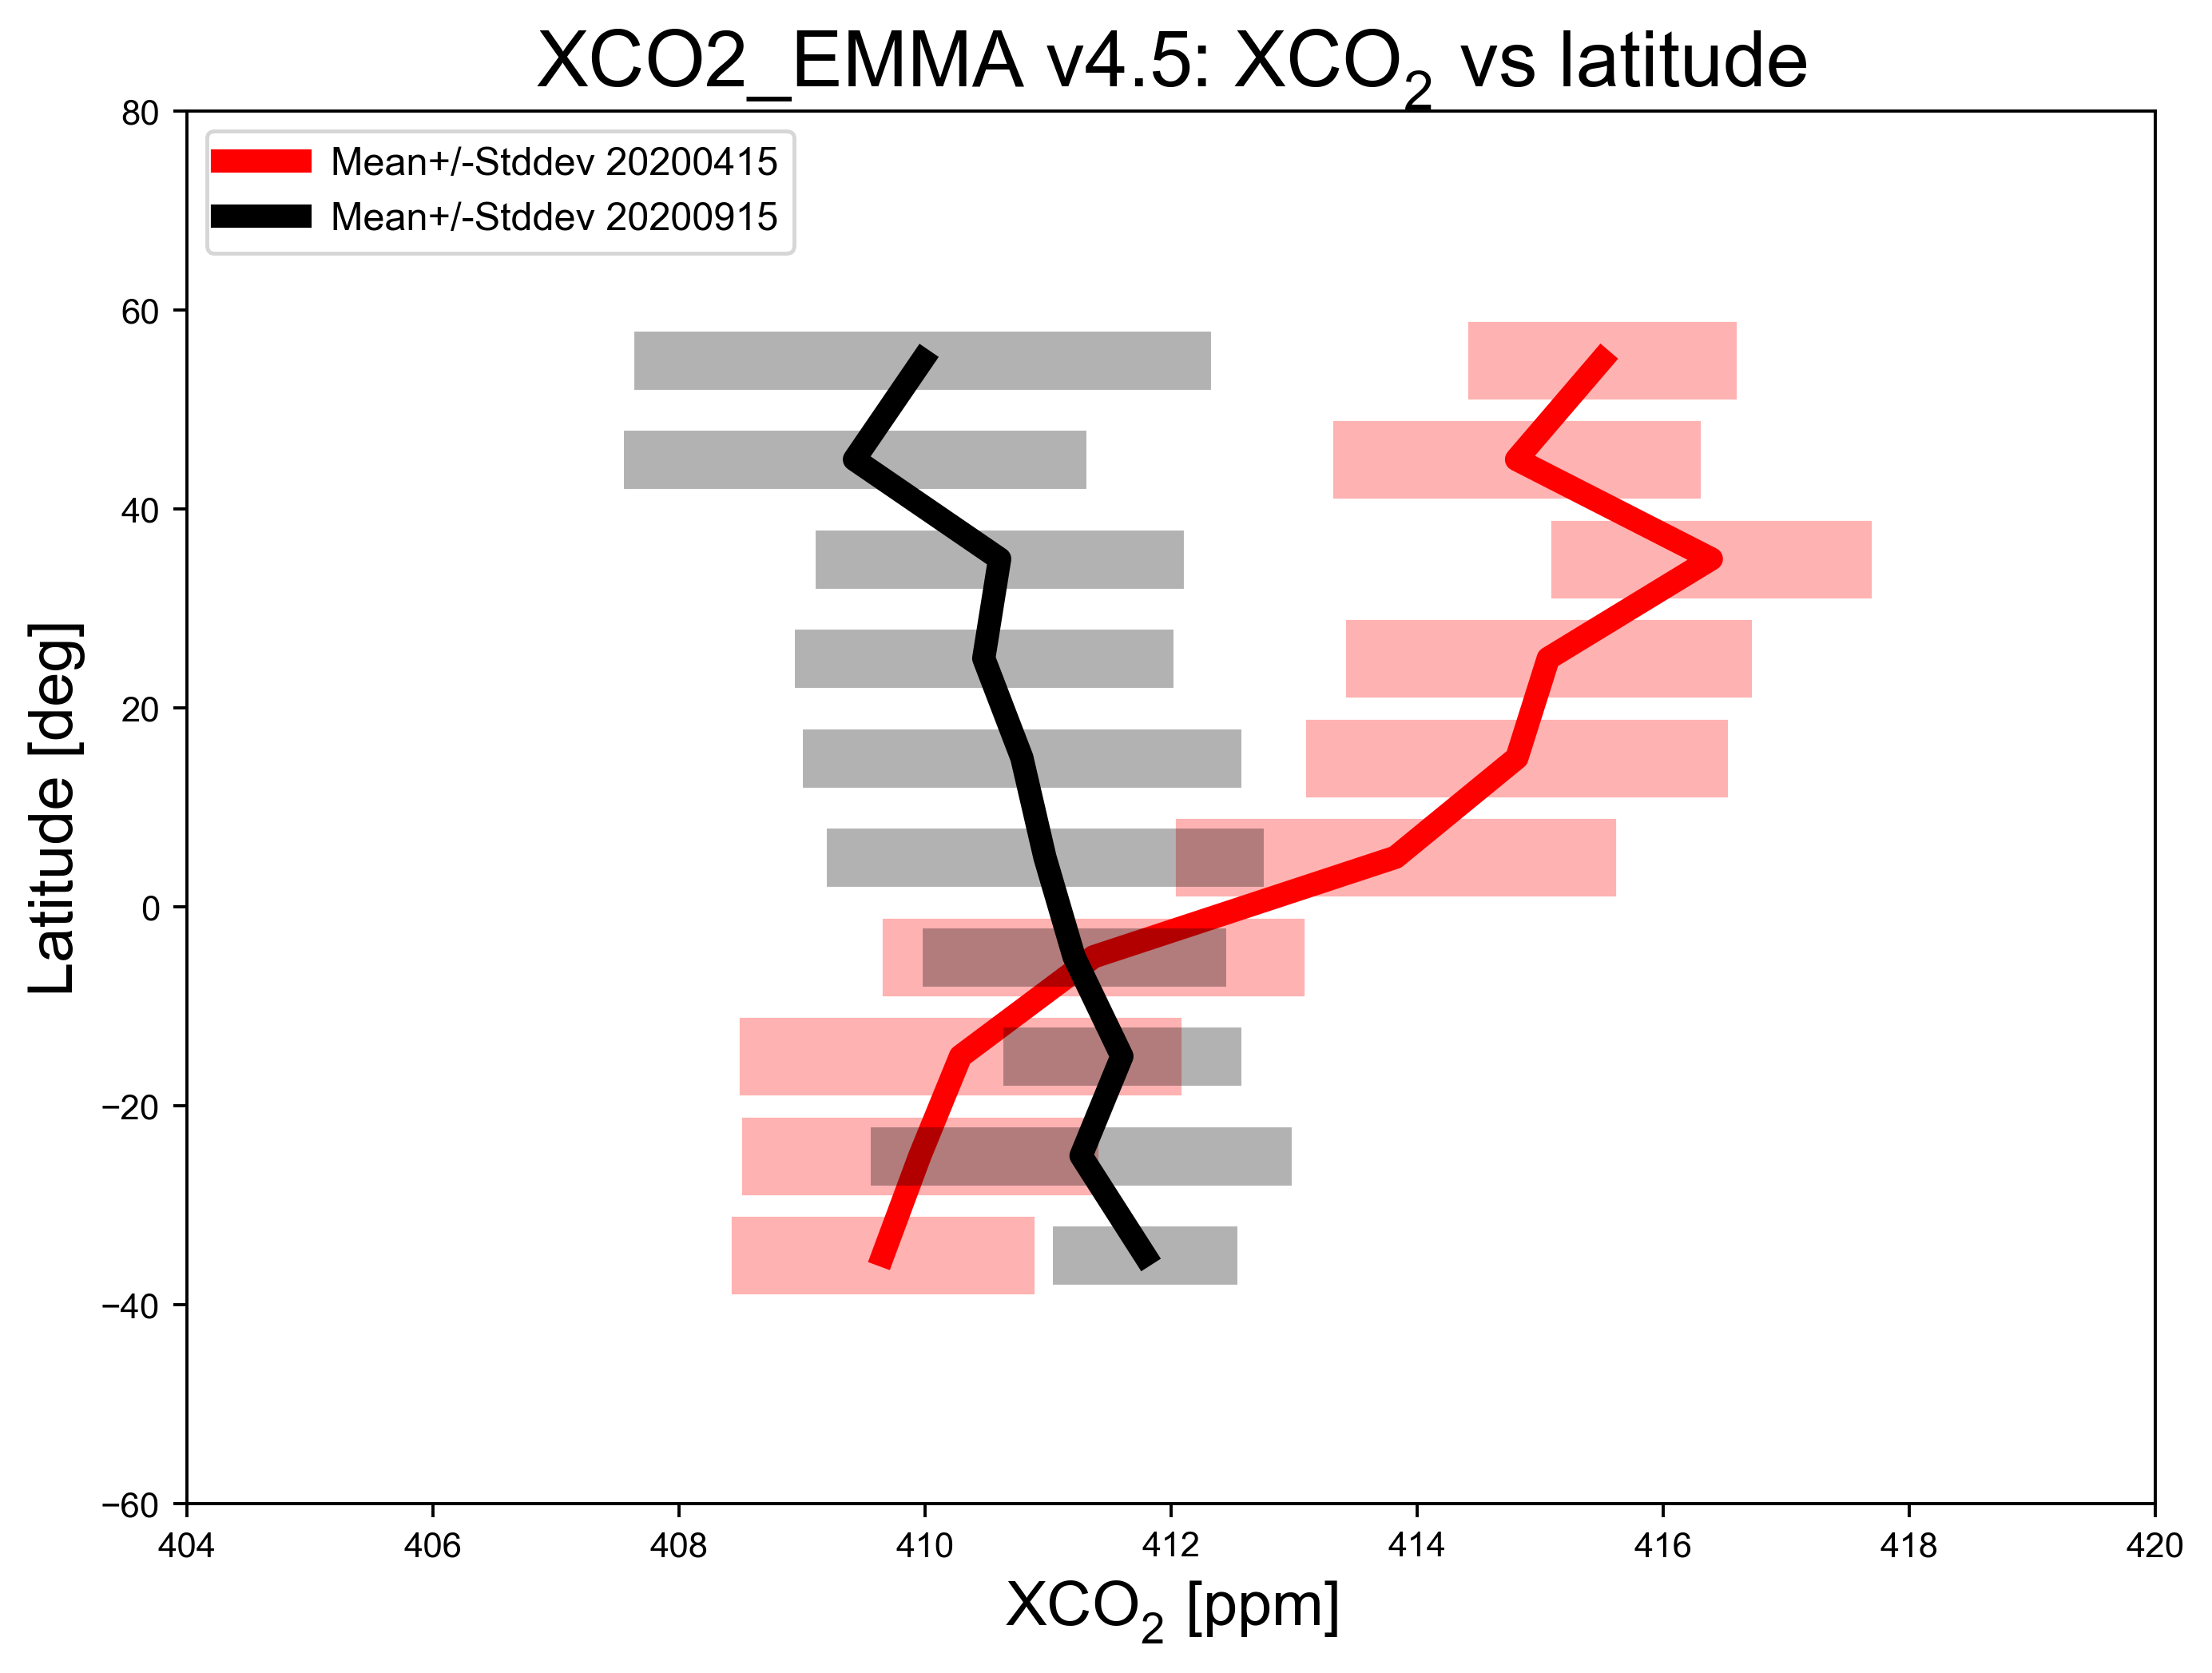

In [18]:
# Generation of xy plot showing XCO2 vs latitude

if wanted_files_OK == 'yes':
   # Plot data:
   figsize = (8,6)                 # Figure size
   fig = plt.figure(figsize=figsize)
   pos = [0.09,0.11,0.88,0.83]     # position (left,bottom,width,height) in page coordinates
   ax  = fig.add_axes(pos)
   xmin = 404.0                    # x axis range of plot
   xmax = 420.0
   ymin = -60.0                    # y axis range of plot
   ymax =  80.0
   ax.axis([xmin, xmax, ymin, ymax])
   file_1_date2 = date_1_str
   file_2_date2 = date_2_str
   # -----------------------------------
   # plot day 1 data:
   ax.plot(lb_1_xco2_mean, lb_1_lat, linewidth=6.0, color='red', zorder=39, label = 'Mean+/-Stddev '+file_1_date2)
   if 1 == 0:
      ax.plot(lb_1_xco2_mean-lb_1_xco2_std, lb_1_lat, linewidth=2.0, color='red', zorder=38)
      ax.plot(lb_1_xco2_mean+lb_1_xco2_std, lb_1_lat, linewidth=2.0, color='red', zorder=38)
   else:
      nn_1 = len(lb_1_xco2_mean)
      for ii in range(nn_1):
         yy = lb_1_lat[ii]
         x1 = lb_1_xco2_mean[ii]-lb_1_xco2_std[ii]
         x2 = lb_1_xco2_mean[ii]+lb_1_xco2_std[ii]
         ax.plot([x1, x2], [yy, yy], linewidth=20.0, color='red', zorder=38, alpha=0.3)
   # -----------------------------------
   # plot day 2 data:
   ax.plot(lb_2_xco2_mean, lb_2_lat, linewidth=6.0, color='black', zorder=49, label = 'Mean+/-Stddev '+file_2_date2)
   if 1 == 0:
      ax.plot(lb_2_xco2_mean-lb_2_xco2_std, lb_2_lat, linewidth=2.0, color='black', zorder=48)
      ax.plot(lb_2_xco2_mean+lb_2_xco2_std, lb_2_lat, linewidth=2.0, color='black', zorder=48)
   else:
      nn_2 = len(lb_2_xco2_mean)
      for ii in range(nn_2):
         yy = lb_2_lat[ii]
         x1 = lb_2_xco2_mean[ii]-lb_2_xco2_std[ii]
         x2 = lb_2_xco2_mean[ii]+lb_2_xco2_std[ii]
         ax.plot([x1, x2], [yy, yy], linewidth=15.0, color='black', zorder=48, alpha=0.3)
   # -----------------------------------
   title = product_str
   x_label = 'XCO$_2$ [ppm]'
   y_label = 'Latitude [deg]'
   plot_title = product_str+': XCO$_2$ vs latitude'
   plt.title(plot_title, fontsize=20)
   plt.xlabel(x_label, fontsize=16); plt.ylabel(y_label, fontsize=16)
   plt.legend(loc='upper left')
   plot_type = 'png'
   if plot_type == 'png':
      o_file_plot = product_id+'_'+product_version+'_latitude.png'
      print('* generating: ', o_file_plot)
      plt.savefig(o_file_plot, dpi=600)
   else:
      plt.show()
else:
   print('* ERROR: Cannot generate XCO2 vs latitude plot!?') 

The figure above shows mean value of XCO2 as a function of latitude (thick lines) and the corresponding variation (computed as standard deviation of the individual XCO2 retrievals) within each latitude band (semi-transparent horizontal bars) for 15-April-2020 (red) and 15-September-2020 (black). As can be seen, during September XCO2 shows quite little variation with latitude, whereas in April XCO2 is significantly higher over the northern hemisphere (NH) compared to the southern hemisphere (SH). This is due to the seasonal cycle of CO2 primarily resulting from regular uptake and release of atmospheric CO2 by growing and decaying vegetation (photosythesis and respiration). Vegetation uptake reduces the CO2 concentration over the NH during the growing season (spring and summer) compared to the dormant season (winter). Over the SH there is less vegetation and therefore CO2 is relatively constant (apart from the general increase due to CO2 emissions by burning fossil fuels). 

# Application 2: Showing daily data on a global map

Here we show how to generate a plot showing the spatial distribution of the data. As can be seen, we use only three variables: XCO2, latitude and longitude. We define a small region in terms of latitude and longitude corner coordinates and select only data in this region for the plot.

* Generating XCO2 map ...
* Number of ground pixel for map:  53
* generating:  XCO2_EMMA_v4.5_map.png


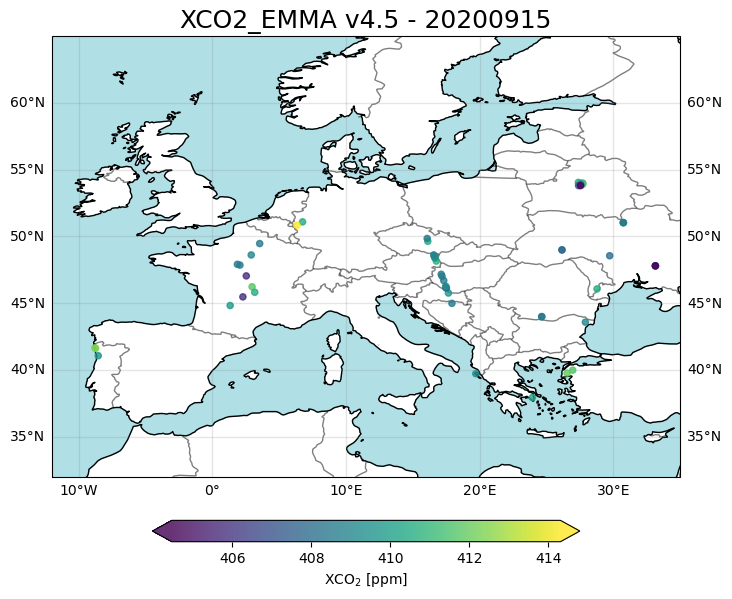

In [14]:
# Generate map:
print('* Generating XCO2 map ...')
if wanted_files_OK == 'yes':
   # Relevant input data:
   lat = g_2_lat.values
   lon = g_2_lon.values
   ghg = g_2_xco2.values
   file_2_date2 = date_2_str
   plot_title = product_str+' - '+file_2_date2
   # Define spatial region of interest:
   lonmin = -12.0         # Longitude range
   lonmax =  35.0
   latmin =  32.0         # Latitude range
   latmax =  65.0
   # Select data to be shown on map:
   idg = np.nonzero((lat > latmin) & (lat < latmax) & (lon > lonmin) & (lon < lonmax))
   lat_sel = lat[idg]
   lon_sel = lon[idg]
   ghg_sel = ghg[idg]
   n_data = len(ghg_sel)
   print('* Number of ground pixel for map: ', n_data)
   rmin  = np.min(ghg_sel)       # Color bar / scale range
   rmax  = np.max(ghg_sel)
   
   projection = ccrs.PlateCarree()
   figsize = (9,7)
   fig = plt.figure(figsize=figsize)
   pos = [0.05,0.00,0.95,0.90]     # pos (l,b,w,h) in page coord
   ax1 = fig.add_axes(pos, projection=projection)
   ax1.set_extent([lonmin, lonmax, latmin, latmax], crs=projection)
   ax1.add_feature(cfeature.OCEAN, color='powderblue')
   ax1.add_feature(cfeature.COASTLINE)
   ax1.add_feature(cfeature.BORDERS, alpha=0.5)
   #x_label = 'Latitude [deg]'
   #y_label = 'Longitude [deg]'
   
   ax1.set_title(plot_title, fontsize=18)
   drawmeridians_label = True
   gl = ax1.gridlines(crs=projection, draw_labels=drawmeridians_label, linewidth=1, color='gray', alpha=0.2)
   gl.top_labels  = False
   plt.scatter(lon_sel, lat_sel, c=ghg_sel, s=20, zorder=10, alpha=0.8, cmap='viridis', vmin=rmin, vmax=rmax)
   #anchor=(0.5, 1.0) # default
   anchor=(0.5, 1.7)  # shift upwards
   cb = plt.colorbar(label='XCO$_2$ [ppm]', location='bottom', extend='both', shrink=0.5, anchor=anchor)
   #cb = plt.colorbar(label='XCO$_2$ [ppm]', location='right', shrink=0.3)
   plot_type = 'png'
   if plot_type == 'png':
      o_file_plot = product_id+'_'+product_version+'_map.png'
      print('* generating: ', o_file_plot)
      plt.savefig(o_file_plot, dpi=600)
   else:
      plt.show()
else:
   print('* ERROR: Cannot generate XCO2 map plot!?')

The figure above shows the locations of the individual ground pixel observations and their corresponding XCO2 value using all "good" retrievals over Europe and surrounding area for 15-Sept-2020. As can be seen, the spatial coverage of the daily data is very sparse. This is because only data of the highest quality are contained in the product file. Strict quality filtering is important to meet the demanding requirements on accuracy and precision for satellite XCO2 data observations.